In [47]:
import warnings
warnings.filterwarnings('ignore')

# b)

In [48]:
import pandas as pd

df = pd.read_csv('sensors.csv')
df.head(7)

,Class,GyroX,GyroY,GyroZ,AccX,AccY,AccZ
0,1,-0.923664,3.694656,0.824427,0.162598,-0.086670,-0.969482
1,1,-0.908397,4.534351,0.832061,0.175781,-0.100586,-1.013184
2,1,0.786260,3.969466,0.587786,0.322754,-0.140381,-0.911621
3,1,0.335878,4.564885,-0.251908,0.480225,-0.226807,-0.936768
4,1,3.351145,2.694656,-0.106870,0.426025,-0.253906,-0.950195
5,1,-1.503817,3.183206,-1.656489,0.383789,-0.141602,-0.919678
6,1,1.358779,8.725191,-0.946565,0.404785,-0.257324,-0.862549


In [49]:
df.isnull().sum()

Class    0
GyroX    0
GyroY    0
GyroZ    0
AccX     0
AccY     0
AccZ     0
dtype: int64

In [50]:
df['Class'].value_counts()

3    350
2    288
1    252
4    224
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

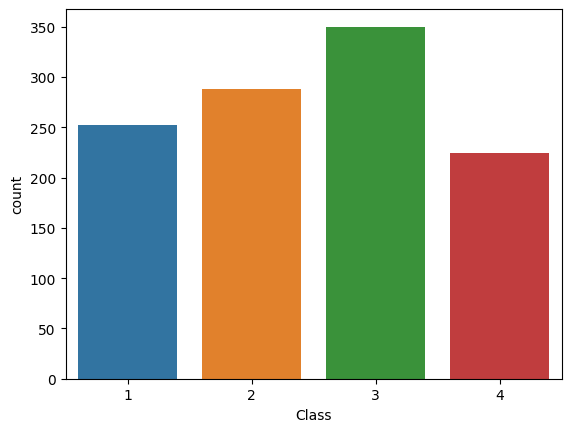

In [51]:
import seaborn as sns

sns.countplot(x="Class", data = df)

# c)

In [52]:
data =  df[['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ']]
yy=df['Class']
data_std = (data - data.mean())/(data.max() - data.min())
data = pd.concat([data_std,yy], axis=1)
data = pd.melt(data, id_vars = 'Class', var_name = 'features',value_name = 'value')
data

,Class,features,value
0,1,GyroX,-0.003380
1,1,GyroX,-0.002829
2,1,GyroX,0.058294
3,1,GyroX,0.042050
4,1,GyroX,0.150805
...,...,...,...
6679,4,AccZ,0.120377
6680,4,AccZ,0.017751
6681,4,AccZ,-0.021370
6682,4,AccZ,-0.043878


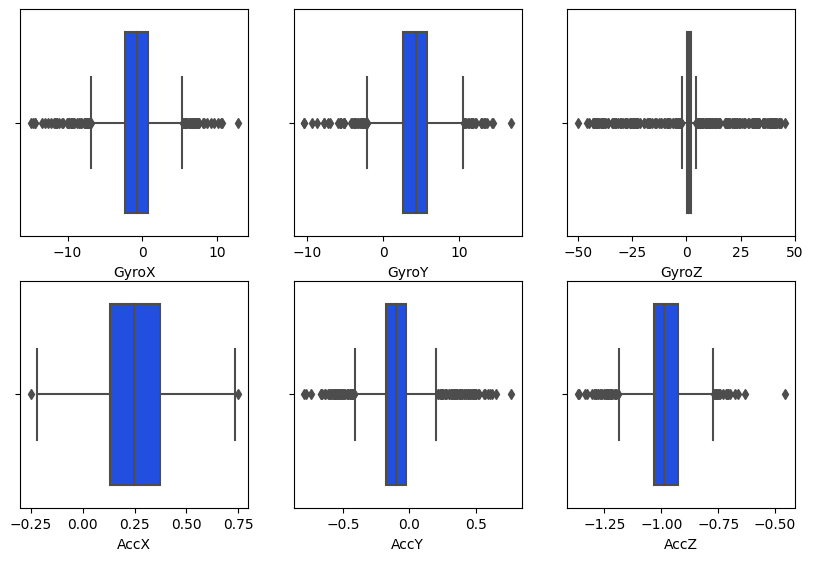

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
columns = list(df.select_dtypes(include="float64").columns)  
for i, c in enumerate(columns, 1):
    plt.subplot(3,3,i) 
    plot=sns.boxplot(x=c, palette="bright", data=df)

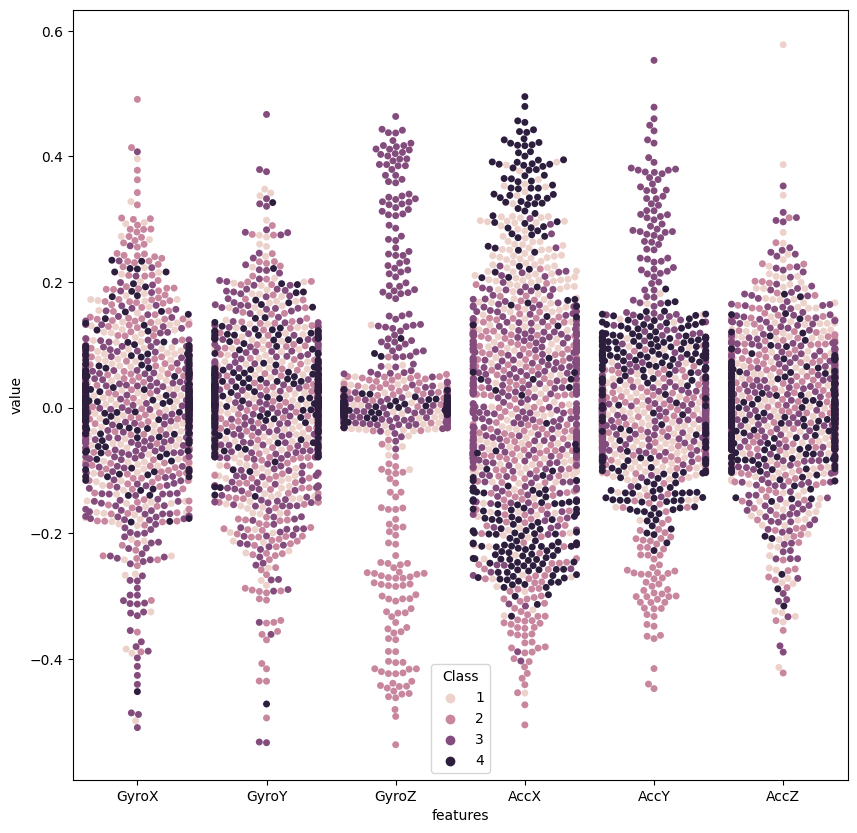

In [54]:
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'Class', data = data)
plt.show()

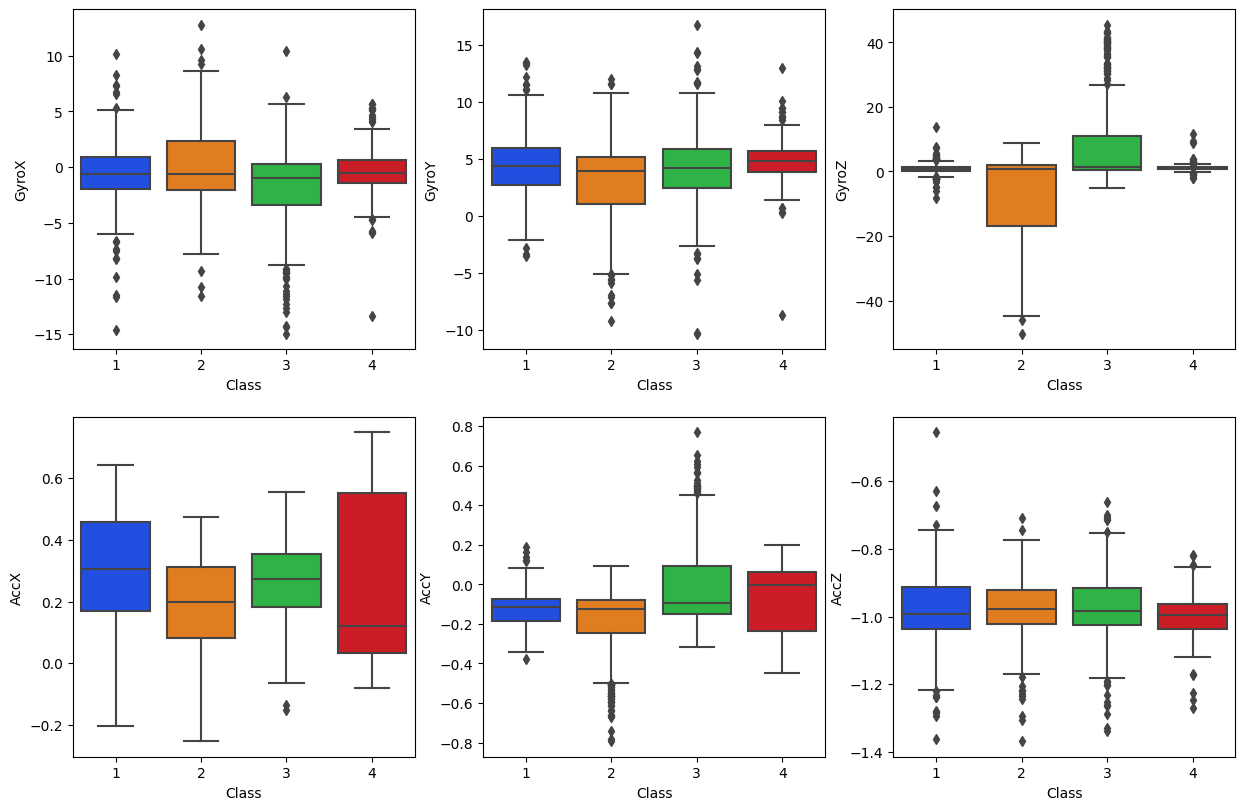

In [55]:

plt.figure(figsize=(15,15))
columns = list(df.select_dtypes(include="float64").columns)  
for i, c in enumerate(columns, 1):
    plt.subplot(3,3,i) 
    plot=sns.boxplot(x="Class", y=c, palette="bright", data=df)

# c)

In [56]:
classes = [1,3,4]
columns =['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY']
# outliers = {'sepal length' : [],'sepal width':[],'petal width':[],'petal length':[]}
for col in columns :
    pl= df[['Class', col]]
    for class1 in classes : 
        if( (col == 'AccX' and (class1 == 3)) or  (col == 'Accy' and (class1 == 1))  
          or (col == 'GyroZ' and ( class1 == 4)) or (col =='GyroX' and ( class1 == 1 or class1==4)) 
          or (col == 'GyroY'  and class1 == 4)) :
            plc=pl.loc[df['Class'] == class1]
            listt=plc[col]
    #         print(listt.mean())

            Q1 = np.percentile(listt, 25, interpolation = 'midpoint')
            Q2 = np.percentile(listt, 50, interpolation = 'midpoint')
            Q3 = np.percentile(listt , 75, interpolation = 'midpoint')
            IQR = Q3 - Q1

            outlier=[x for x in listt if x> 1.5*IQR + Q3]
            outlier+=[x for x in listt if x< Q1 - 1.5*IQR ]
            print( class1, col)
            print("Q1 , Q2 , Q3 , IQR : ",Q1 , Q2 , Q3 , IQR )
#             print("min , max :" , min(listt) , max(listt))
            print("outlier data :" ,outlier, "\n\n")

            for out in outlier :
                tf = np.logical_and((df['Class'] == class1), (df[col]==out))
    #             print(tf)
                df.loc[tf, col] = listt.mean()

1 GyroX
Q1 , Q2 , Q3 , IQR :  -2.030534351 -0.618320611 0.8969465645 2.9274809155
outlier data : [10.15267176, 6.732824427, 7.290076336, 5.351145038, 6.58778626, 7.34351145, 8.267175573, -7.374045802, -8.167938931, -11.66412214, -6.709923664, -7.541984733, -11.48091603, -9.839694656, -14.64885496, -6.641221374, -8.221374046] 


4 GyroX
Q1 , Q2 , Q3 , IQR :  -1.4694656485 -0.561068702 0.6145038165 2.083969465
outlier data : [5.160305344, 4.503816794, 5.160305344, 5.290076336, 4.06870229, 5.679389313, 5.312977099, 4.114503817, 4.641221374, 5.633587786, 4.305343511, -13.35877863, -4.702290076, -5.877862595, -5.847328244, -5.717557252, -4.694656489] 


4 GyroY
Q1 , Q2 , Q3 , IQR :  3.8358778625 4.847328244 5.6679389315 1.8320610690000003
outlier data : [10.13740458, 9.091603053, 9.122137405, 8.465648855, 12.98473282, 8.580152672, 9.480916031, 8.65648855, 8.770992366, 9.442748092, 0.351145038, -8.679389313, 0.671755725, 0.290076336, 0.702290076] 


4 GyroZ
Q1 , Q2 , Q3 , IQR :  0.667938931 

<Axes: >

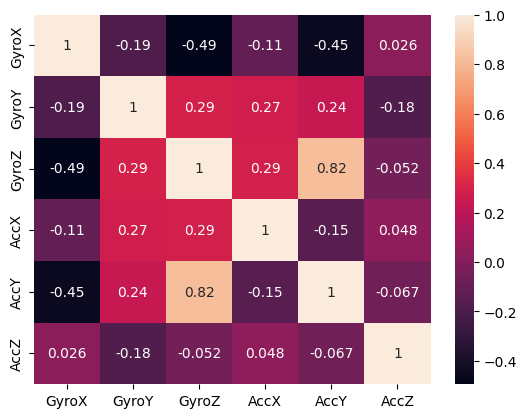

In [57]:
sns.heatmap(df[['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ']].corr(), annot=True)

In [58]:
df.columns

Index(['Class', 'GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ'], dtype='object')

In [59]:
X, Y = df.drop(['Class'], axis=1).values, df['Class'].values
X,Y

(array([[-0.92366412,  3.69465649,  0.82442748,  0.16259766, -0.08666992,
         -0.96948242],
        [-0.90839695,  4.53435114,  0.83206107,  0.17578125, -0.10058594,
         -1.01318359],
        [ 0.78625954,  3.96946565,  0.58778626,  0.32275391, -0.14038086,
         -0.91162109],
        ...,
        [-1.0610687 ,  4.53435114,  1.18320611,  0.41918945, -0.19287109,
         -1.00268555],
        [-1.01526718,  5.25954199,  0.65648855,  0.30883789, -0.09008789,
         -1.02319336],
        [-0.87786259,  4.48854962,  0.04580153,  0.09814453, -0.01586914,
         -1.0012207 ]]),
 array([1, 1, 1, ..., 4, 4, 4]))

In [60]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

array([[-0.03170665, -0.13015507, -0.01861359, -0.49672404,  0.04434692,
         0.14009952],
       [-0.02685281,  0.13389953, -0.01797916, -0.42440636, -0.02877161,
        -0.3057532 ],
       [ 0.51192402, -0.0437372 , -0.03828114,  0.38180183, -0.23786493,
         0.73041848],
       [ 0.36873558,  0.14350152, -0.10806921,  1.24559632, -0.69196946,
         0.47386636],
       [ 1.32737003, -0.4446201 , -0.09601491,  0.94829031, -0.83435816,
         0.33687251]])

# d & e)

In [61]:
from sklearn.model_selection import train_test_split

train_ratio = 0.70
test_ratio = 0.30
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=test_ratio, random_state=3, stratify= Y )
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (779, 6) (779,)
Test set: (335, 6) (335,)


## checking knn with diffrents parameters

Text(0.5, 1.0, ' weight = manhatan and metric = uniform ')

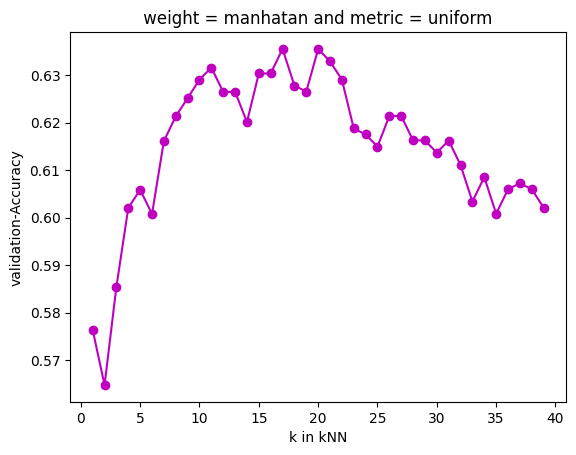

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracies = []
cross_validation_fold = 10 
ks = range(1,40)
for k in ks:
    knn = KNeighborsClassifier(metric='manhattan', n_neighbors= k, weights= 'uniform')
    scores = cross_val_score(knn, X_train, y_train, cv=cross_validation_fold)
    accuracies.append(scores.mean())
    
fig2 = plt.figure()
plt.plot(ks, accuracies,'m-o')
plt.xlabel('k in kNN')
plt.ylabel('validation-Accuracy')
plt.title(' weight = manhatan and metric = uniform ')

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

knn = KNeighborsClassifier()
skfold = StratifiedKFold(n_splits=10)
ks = [1,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
weights =  ['uniform']
metrics =  ['euclidean','manhattan']
hyperprameter_candidates = [{'n_neighbors': ks, 'weights': weights , 'metric' : metrics}]


grid = GridSearchCV(estimator=knn, param_grid=hyperprameter_candidates, cv=skfold)
g_res = grid.fit(X_train, y_train)

print( "best accuracy :" , g_res.best_score_)
print("best prameter :" , g_res.best_params_)

best accuracy : 0.6355144855144854
best prameter : {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


In [64]:
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, g_res.predict(X_train)))

Train set Accuracy:  0.6893453145057766


In [65]:
from sklearn.model_selection import cross_validate

accuracies = []
acc_train = []
cross_validation_fold = 10 
ks = range(1,30)
for k in ks:
    
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k , weights = 'distance',metric="euclidean")
   
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_validate(knn, X_train, y_train, cv=cross_validation_fold , return_train_score=True , )
    
    accuracies.append(scores['test_score'].mean())
    acc_train.append(scores['train_score'].mean())

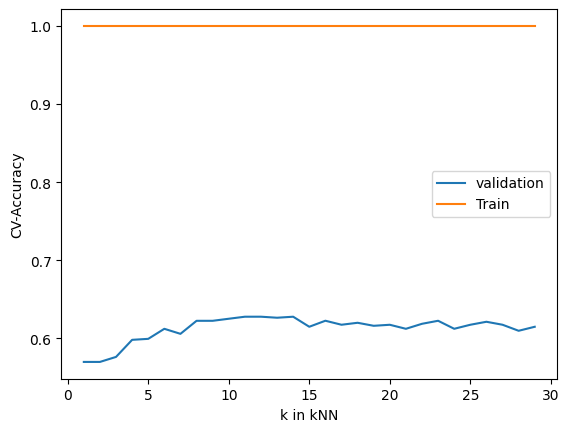

In [66]:
fig2 = plt.figure()
plt.plot(ks, accuracies, label ="validation")
plt.plot(ks, acc_train, label='Train')
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
plt.legend()

In [67]:
best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors= 17, weights= 'uniform')
best_knn.fit(X_train , y_train )
yhat = best_knn.predict(X_test)

y_pred = best_knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_mat)

r2 = metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

Accuracy: 0.5880597014925373
Confusion matrix:
[[26 17 21 12]
 [10 50 20  7]
 [15 21 65  4]
 [ 6  2  3 56]]
R2 score: -0.12797345089869672


## Desision Tree 

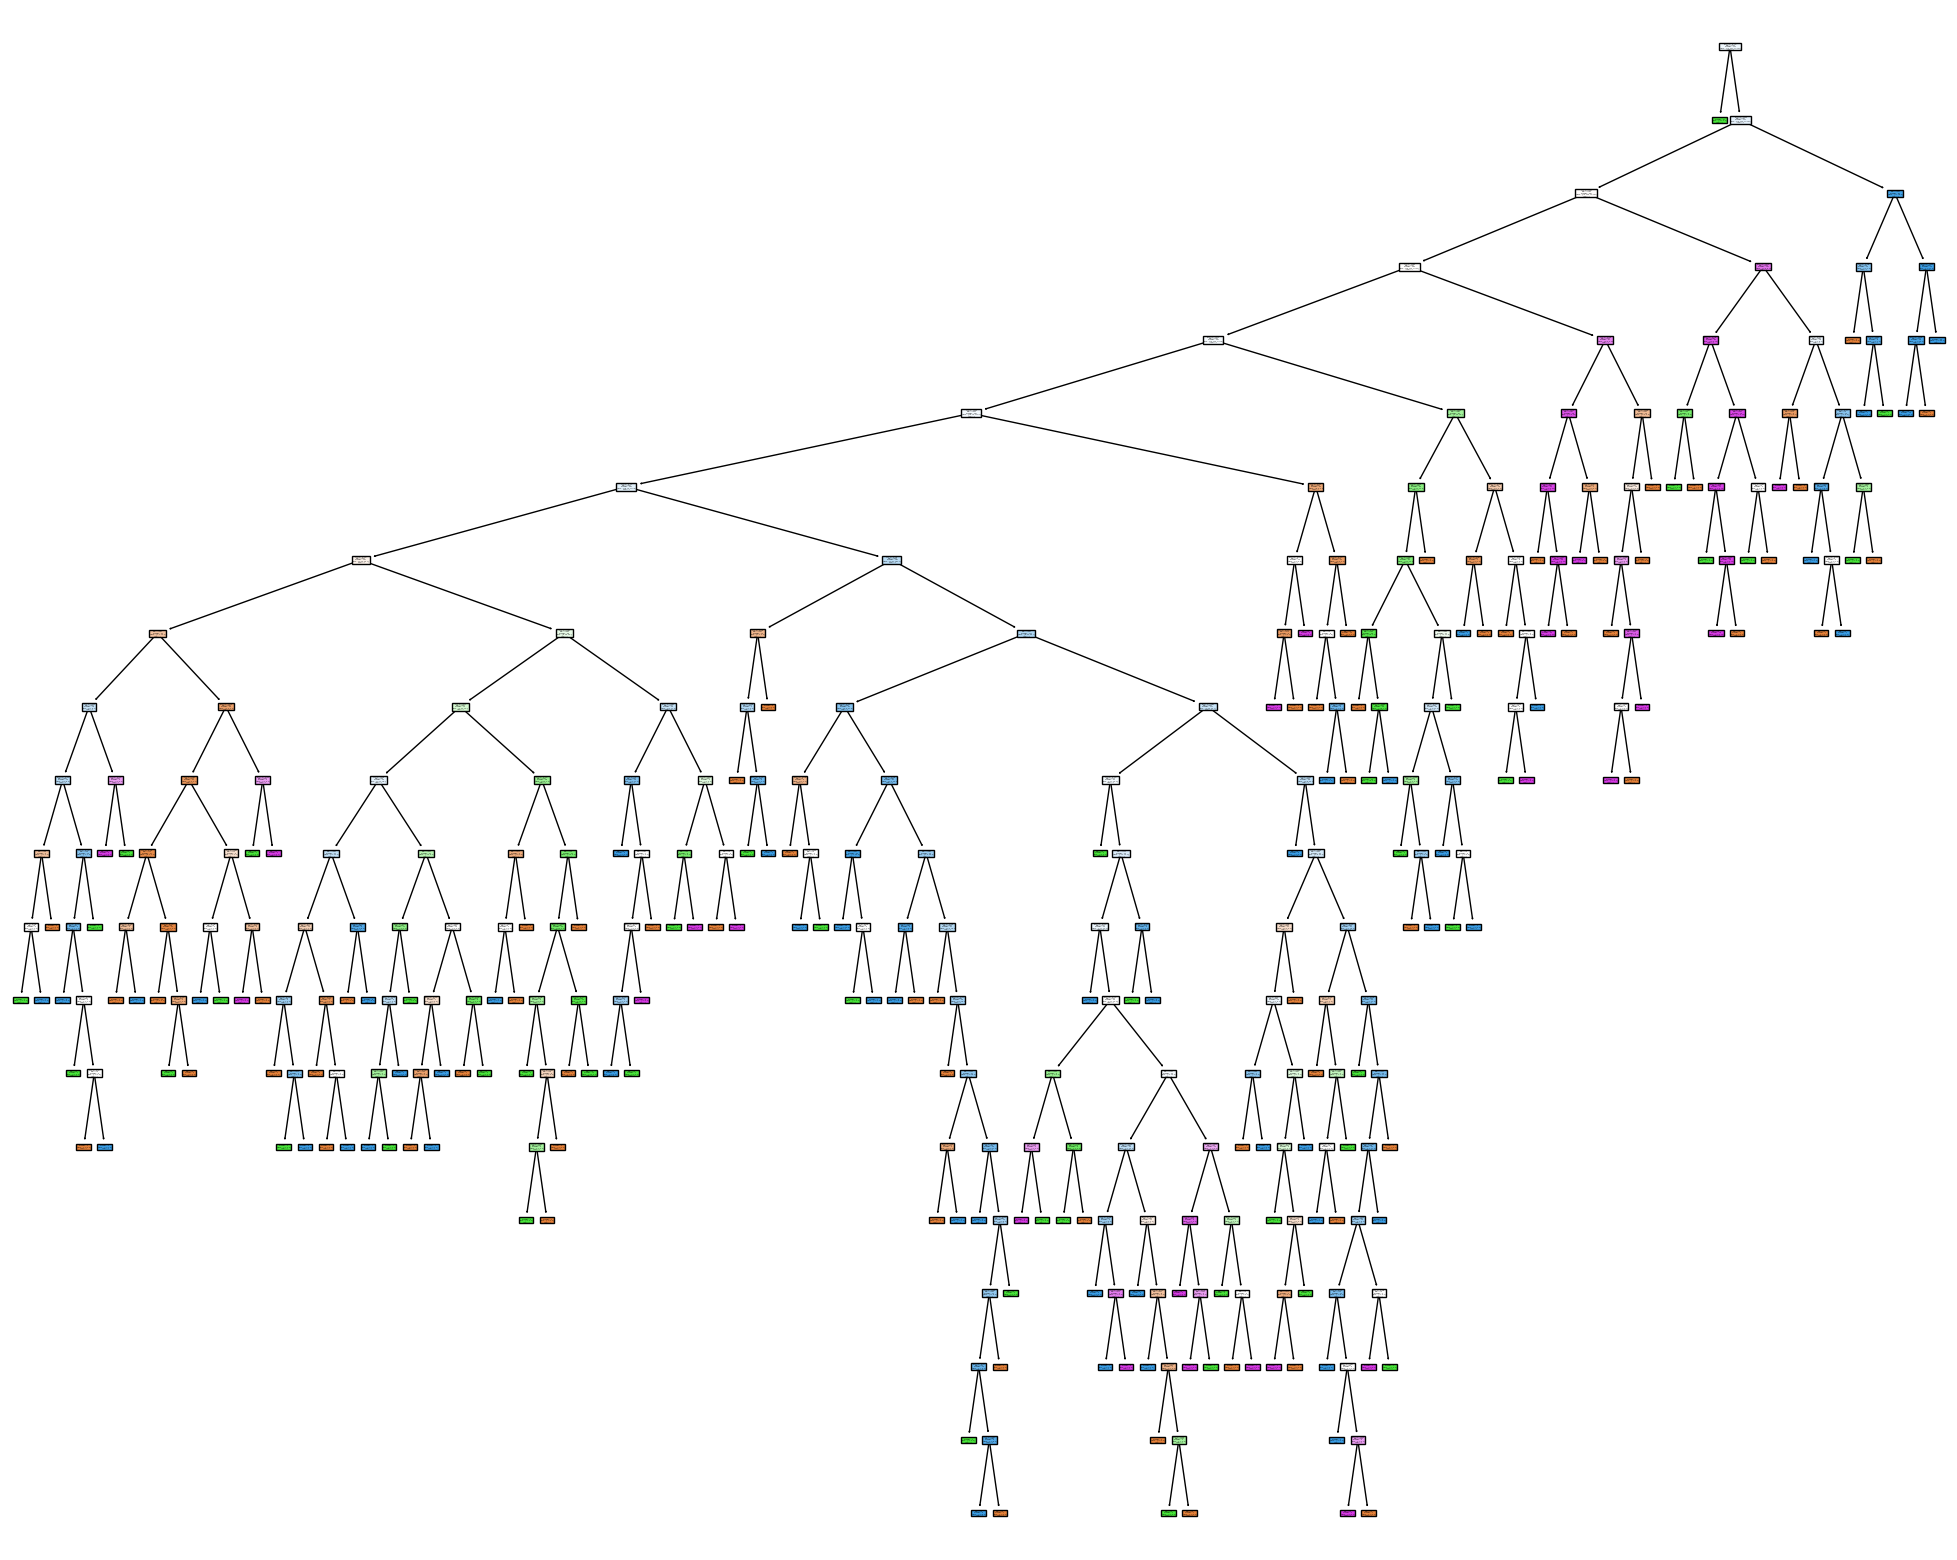

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(X_train,y_train)


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisionTree_model,
                   feature_names= ['GyroX', 'GyroY', 'GyroZ', 'AccX', 'AccY', 'AccZ'],
                   class_names=['1','2','3','4'],
                   filled=True)

In [69]:
from sklearn import metrics


y_pred = decisionTree_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_mat)

r2 = metrics.r2_score(y_test, y_pred)
print('R2 score:', r2)

Accuracy: 0.5701492537313433
Confusion matrix:
[[35 16 16  9]
 [11 51 19  6]
 [24 23 51  7]
 [ 8  4  1 54]]
R2 score: -0.16313809085477127
